In [71]:
print(" Welcome to the chemical descriptor analysis script. Be careful not to break everything")

 Welcome to the chemical descriptor analysis script. Be careful not to break everything


In [72]:
val = (input("name: "))
print(f" {val} hello my name is {val}")

 Martin hello my name is Martin


In [73]:
alder = (input("Alder: "))
print(f"{val}'s age is {alder}")

Martin's age is 31


In [1]:

import rdkit as rdkit
print("rdkit imported successfully")

rdkit imported successfully


In [2]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Descriptors
from rdkit.Chem import AllChem
from rdkit import DataStructs
from rdkit import rdBase
import numpy as np



In [3]:
mol1 = Chem.MolFromSmiles("OC[C@H]1OC(O)[C@H](O)[C@@H](O)[C@@H]1O") #Glucose   
mol2 = Chem.MolFromInchi("1S/C6H12O6/c7-1-2-3(8)4(9)5(10)6(11)12-2/h2-11H,1H2/t2-,3-,4+,5-,6?/m1/s1") #Glucose
# mol2 = Chem.MolFromInchi("1S/C5H6O5/c6-3(5(9)10)1-2-4(7)8/h1-2H2,(H,7,8)(H,9,10)/p-2") #alfa-KETOGLUTARATE

# mol3 = Chem.Smiles

DRAWING MOLECULES

In [11]:
mol2

In [78]:
smiles = Chem.MolToSmiles(mol)

In [79]:
smiles

'OC[C@H]1OC(O)[C@H](O)[C@@H](O)[C@@H]1O'

EXTRACTING CHEMICAL DESCRIPTORS


In [8]:
# mw = Descriptors.MolWt(mol)

mw2 = Descriptors.MolLogP(mol2)

ArgumentError: Python argument types in
    rdkit.Chem.rdMolDescriptors.CalcCrippenDescriptors(NoneType)
did not match C++ signature:
    CalcCrippenDescriptors(class RDKit::ROMol mol, bool includeHs=True, bool force=False)

In [7]:
mw2

-3.2214000000000005

In [82]:
smiles_list = ['OC[C@H]1OC(O)[C@H](O)[C@@H](O)[C@@H]1O', "CC(=O)[O-]","O=P(O)(O)OP(=O)(O)OP(=O)(O)OC[C@H]3O[C@@H](n2cnc1c(ncnc12)N)[C@H](O)[C@@H]3O", "S"]


In [83]:
smiles_list


['OC[C@H]1OC(O)[C@H](O)[C@@H](O)[C@@H]1O',
 'CC(=O)[O-]',
 'O=P(O)(O)OP(=O)(O)OP(=O)(O)OC[C@H]3O[C@@H](n2cnc1c(ncnc12)N)[C@H](O)[C@@H]3O',
 'S']

In [84]:
mol_list = []
for smiles in smiles_list:
    mol = Chem.MolFromSmiles(smiles)
    mol_list.append(mol)



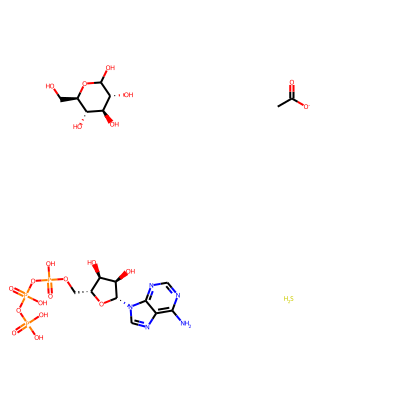

In [85]:
img = Draw.MolsToGridImage(mol_list, molsPerRow = 2, useSVG = True)

#Calls img
img

List of Metabolites in the central TCA cycle

In [86]:
TCA_smile_list = [
"OC(=O)CC(O)(C(=O)O)CC(=O)O",
"C(C(=CC(=O)O)C(=O)O)C(=O)O","C(C(C(C(=O)O)O)C(=O)O)C(=O)O", 
"O=C(O)C(=O)CCC(=O)O",
"O=C(O)CCC(=O)SCCNC(=O)CCNC(=O)[C@H](O)C(C)(C)COP(=O)(O)OP(=O)(O)OC[C@H]3O[C@@H](n2cnc1c(ncnc12)N)[C@H](O)[C@@H]3OP(=O)(O)O",
"C(CC(=O)O)C(=O)O", 
"C(=C/C(=O)O)\C(=O)O", 
"O=C(O)CC(O)C(=O)O", 
"O=C(O)C(=O)CC(=O)O"]

In [87]:
TCA_draw = []
for smiles in TCA_smile_list:
    mol = Chem.MolFromSmiles(smiles)
    TCA_draw.append(mol)


In [88]:
imgTCA = Draw.MolsToGridImage(TCA_draw, molsPerRow = 3, useSVG = True)

In [ ]:
imgTCA

In [ ]:
#pattern = Chem.MolFromSmiles("S")
#pattern = Chem.MolFromSmiles("C(=O)O")
#pattern = Chem.MolFromSmiles("CC(N)C")

pattern = Chem.MolFromSmarts("[r5]")

for mol in TCA_draw:
    print(mol.HasSubstructMatch(pattern))

FINGERPRINTING


In [91]:
glucose = mol_list[0]

In [ ]:
glucose

In [ ]:
bi = {}
fp = AllChem.GetMorganFingerprintAsBitVect(glucose,2, nBits = 1024, bitInfo = bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp, fp_arr)
fp_arr


In [ ]:
np.nonzero(fp_arr)

In [ ]:
bi

In [104]:
prints = [(glucose, x, bi) for x in fp.GetOnBits()]

In [ ]:
prints

In [110]:
print(rdBase.rdkitVersion)
import time
print(time.asctime())

2021.03.5
Tue Sep 21 15:32:08 2021


In [ ]:
Chem.innchi